# Data Bootcamp:  Examples

Most of what we do in this course is find some data that interests us, read it into Python, organize it in a convenient form, and produce a graph.  The details vary, but that's the general plan.  The best-case scenario:  The graph tells us something we don't know, and points to other things we'd like to follow up on.  As for the Python code: You'll be able to do all this and more by the end of the term.  

Most of this runs with packages that come pre-installed with the [Anaconda distribution](https://www.continuum.io/downloads). The exceptions are the options example, which uses the pandas-datareader package, and the heatmap we produced for economic indicators using the seaborn package. We'll talk more about this later, but you can install them from the terminal or command line with `conda install package`.

This IPython notebook was created by Dave Backus, Chase Coleman, and Spencer Lyon for the NYU Stern course [Data Bootcamp](http://databootcamp.nyuecon.com/).  

## Preliminaries

The tradition is to put import statements at the top and be done with them.  But since we sometimes run sections of code separately, we've repeated some of them below.  That's ok, a second import is redundant but does only aesthetic harm.  

In [1]:
# import packages 
import pandas as pd                   # data management
import matplotlib.pyplot as plt       # graphics 
import matplotlib as mpl              # graphics parameters
import numpy as np                    # numerical calculations 

# IPython command, puts plots in notebook 
%matplotlib inline

# check Python version 
import datetime as dt 
import sys
print('Today is', dt.date.today())
print('What version of Python are we running? \n', sys.version, sep='') 

Today is 2017-03-06
What version of Python are we running? 
3.5.2 |Anaconda custom (64-bit)| (default, Jul  2 2016, 17:53:06) 
[GCC 4.4.7 20120313 (Red Hat 4.4.7-1)]


## Example:  US economic conditions

We see a lot of variation in GDP growth rates in all countries.  It's not obvious why, but it's  a fact of life, and one that investors and other business analysts track closely.  Basic numbers like GDP only come out quarterly, and with at least a one month lag, so we're often in the position of not knowing how the economy is doing now, much less how it will do in the future.  To get a clearer sense of current conditions, analysts typically look at a wide range of indicators.  Many of these indicators are available more quickly than GDP.  Since they typically move up and down with GDP, we can use their movements to infer what GDP might be doing.  

Of the hundreds of economic indicators, some of the most popular (with their FRED codes) are 

* INDPRO:  industrial production
* PAYEMS:  nonfarm employment 
* AWHMAN:  average weekly hours worked in manufacturing
* PERMIT:  permits for new housing 
* UMCSENT: consumer sentiment 

All of them are monthly.  You can find more about this kind of thing in [our book](http://www.stern.nyu.edu/experience-stern/about/departments-centers-initiatives/centers-of-research/global-economy-business/development-initiatives/global-economy-course), chapter 11.  

In [2]:
# get data from FRED
import pandas as pd 
from pandas_datareader import data, wb
import datetime as dt                  # handles dates 

# get data 
indicators = ['INDPRO', 'PAYEMS', 'AWHMAN', 'PERMIT', 'UMCSENT']
start_date = dt.datetime(1970, 1, 1)
inds = data.DataReader(indicators, "fred", start_date)
end = inds.index[-1]

# yoy growth rates 
g = inds.pct_change(periods=12).dropna()
# standardize
g_std = (g - g.mean()) / g.std()
gs = g_std

# correlations 
g_std.corr()

,INDPRO,PAYEMS,AWHMAN,PERMIT,UMCSENT
INDPRO,1.000000,0.767773,0.610687,0.237713,0.262575
PAYEMS,0.767773,1.000000,0.268430,0.086138,0.064172
AWHMAN,0.610687,0.268430,1.000000,0.423530,0.443926
PERMIT,0.237713,0.086138,0.423530,1.000000,0.523937
UMCSENT,0.262575,0.064172,0.443926,0.523937,1.000000


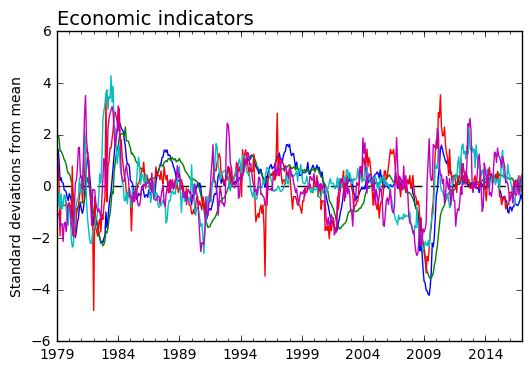

In [3]:
# plot 
fig, ax = plt.subplots()
g_std.plot(ax=ax) 
ax.set_title('Economic indicators', fontsize=14, loc='left')
ax.set_ylabel('Standard deviations from mean')
ax.set_xlabel('')
ax.hlines(y=0, xmin=start_date, xmax=end, linestyles='dashed')
ax.legend().set_visible(False)

In [4]:
# focus on recent past 
recent_date = dt.datetime(2011, 1, 1)
g_std = g_std[g_std.index>=recent_date]

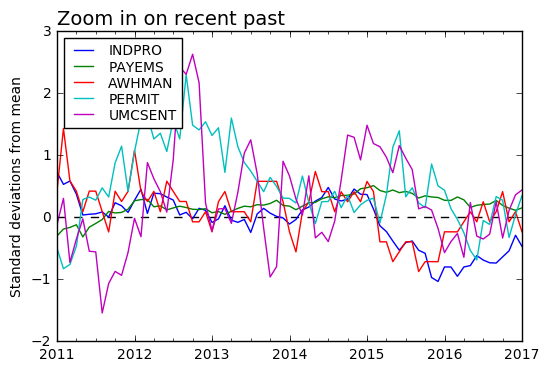

In [5]:
fig, ax = plt.subplots()
g_std.plot(ax=ax)
ax.set_title('Zoom in on recent past', fontsize=14, loc='left')
ax.set_ylabel('Standard deviations from mean')
ax.set_xlabel('')
ax.hlines(y=0, xmin=recent_date, xmax=end, linestyles='dashed')
ax.legend(loc='upper left', fontsize=10, handlelength=2, labelspacing=0.15)

**Comment.** Chase likes heatmaps.   The one that follows needs work, but it's an attempt to reproduce the previous graph as a heatmap, where the value of the variable is represented by the color and its intensity.  Dark red:  large postive value.  Dark blue:  large negative value.  Light colors:  small values.  

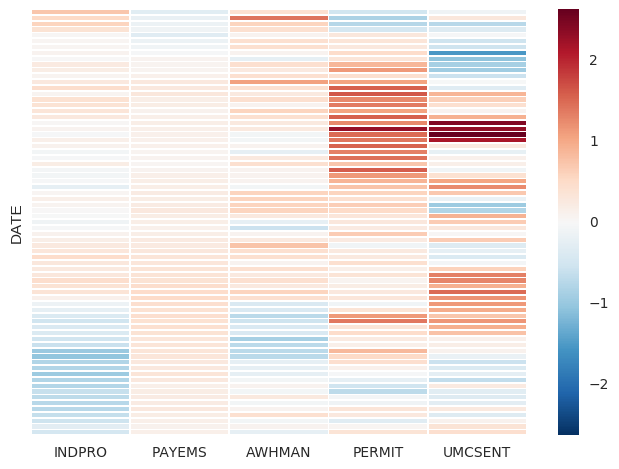

In [6]:
import seaborn as sns      # graphics packages
fig, ax = plt.subplots()
sns.heatmap(g_std, linewidths=.5, ax=ax)
ax.set_yticklabels(g_std.index, visible=False);

**Comment.** This needs some work on the dates.  

### Questions

* What would you change in this picture?
* What did you learn?
* What else would you like to know?
* Where does the data come from?    

The following two lines reset the graphics to the pyplot standard.  If we ignore them, we get the seaborn standard, which most people think looks better.  If you don't have seaborn installed, none of this matters.  

In [7]:
# reset graphics (or not) 
#mpl.rcParams.update(mpl.rcParamsDefault)
#%matplotlib inline

## Example:  Employment trends  

Not long ago, the US had more people working (a higher fraction of the adult population) than many other developed countries.  Over the past 15 years things have flipped.  The deep question is why, but here we simply report what we know.   

The key variables are the **employment rate** (fraction of people aged 25-54) and the **participation rate** (fraction either working or unemployed).  They're similar but the latter irons out some of the cyclical fluctuations.  We get the data from FRED, but they get it from the OECD's Main Economic Indicators, which covers mostly rich countries.  

In [8]:
# countries = AU, CA, CH, DE, ES, EU, EZ, FR, GB, JP, KR, NL, O1 (OECD), SE, US, ZA 
countries = ['CA', 'DE', 'GB', 'JP', 'US']
emcodes = ['LREM25TT' + c + 'Q156S' for c in countries]
lrcodes = ['LRAC25TT' + c + 'Q156S' for c in countries]

start_date = dt.datetime(2000, 1, 1)
em = data.DataReader(emcodes, 'fred', start_date)
lr = data.DataReader(lrcodes, 'fred', start_date)
em.columns = countries
lr.columns = countries
em.head(3)

,CA,DE,GB,JP,US
DATE,,,,,
2000-01-01,79.900000,NaN,79.913064,78.392194,81.683615
2000-04-01,79.900000,NaN,80.184368,78.838946,81.616079
2000-07-01,79.833333,NaN,80.442829,78.744605,81.277837


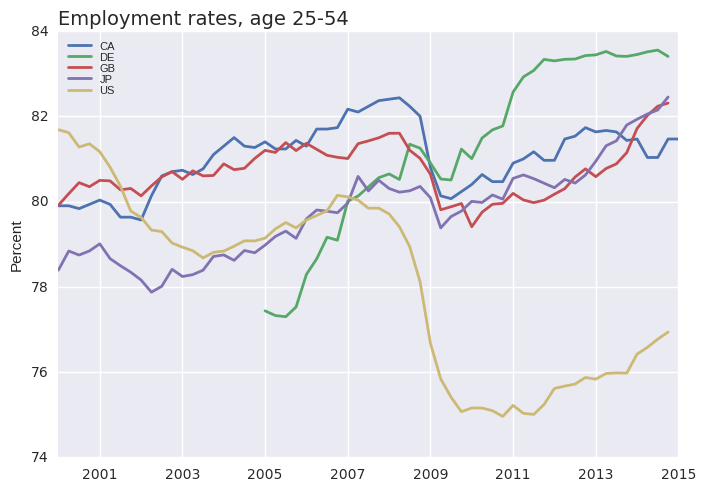

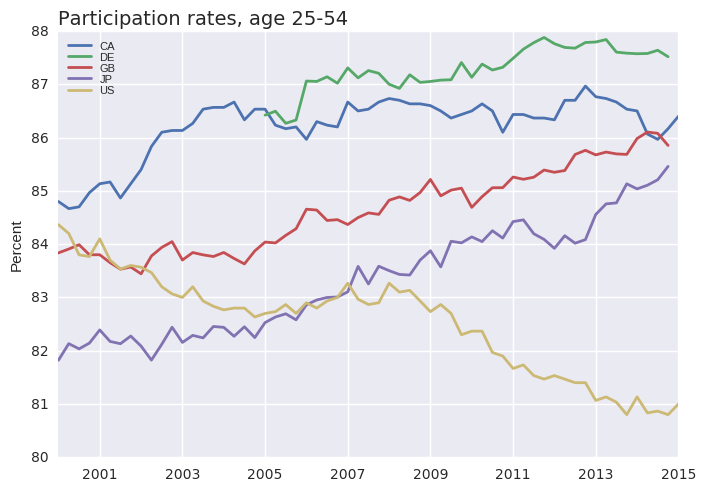

In [9]:
def emplot(em, title):
    fig, ax = plt.subplots()
    em.plot(ax=ax, lw=2)
    ax.set_title(title, fontsize=14, loc='left')
    ax.set_xlabel('')
    ax.set_ylabel('Percent')
    ax.legend(loc='best', fontsize=8, handlelength=2, labelspacing=0.1)
    
emplot(em, 'Employment rates, age 25-54')
emplot(lr, 'Participation rates, age 25-54')

### Questions

* What would you change in this picture?
* What did you learn?
* What else would you like to know?
* Where does the data come from?   

## Example:  Government debt 

One of the traditional ways for a country to get into trouble is to issue so much debt that investors worry about getting paid back.  How much is that?  Hard to say, but we'll look at some debt numbers from the IMF's World Economic Outlook or [WEO](https://www.imf.org/external/ns/cs.aspx?id=28), a popular source of international data on debt, deficits, and other macroeconomic indicators.  We use numbers for the ratio of government debt to GDP, a standard indicator of public indebtedness.  

Given recent events, we pay special attention to Argentina and Greece.  

In [10]:
%%time 

url = 'http://www.imf.org/external/pubs/ft/weo/2016/02/weodata/WEOOct2016all.xls'
weo = pd.read_csv(url, sep='\t', thousands=',', na_values=['n/a', '--']) 
weo.shape

CPU times: user 184 ms, sys: 64 ms, total: 248 ms
Wall time: 2.85 s


In [11]:
list(weo[list(range(12))])

['WEO Country Code',
 'ISO',
 'WEO Subject Code',
 'Country',
 'Subject Descriptor',
 'Subject Notes',
 'Units',
 'Scale',
 'Country/Series-specific Notes',
 '1980',
 '1981',
 '1982']

In [12]:
country_guide = weo[['ISO', 'Country']].drop_duplicates().set_index('ISO')

variable_guide = weo[['WEO Subject Code', 'Subject Descriptor', 'Subject Notes']].drop_duplicates().set_index('WEO Subject Code')
variable_guide.head(3)

,Subject Descriptor,Subject Notes
WEO Subject Code,,
NGDP_R,"Gross domestic product, constant prices",Expressed in billions of national currency uni...
NGDP_RPCH,"Gross domestic product, constant prices",Annual percentages of constant price GDP are y...
NGDP,"Gross domestic product, current prices",Expressed in billions of national currency uni...


In [13]:
variables = ['GGXWDG_NGDP']
countries = ['ARG', 'DEU', 'FRA', 'GRC', 'USA']
debt = weo[weo['ISO'].isin(countries) & weo['WEO Subject Code'].isin(variables)]
some = [3] + list(range(9,44))
debt = debt[some].set_index('Country').T.dropna()
debt.head(3)

Country,Argentina,France,Germany,Greece,United States
2001,49.436,58.156,57.582,107.081,53.022
2002,152.112,60.078,59.220,104.863,55.379
2003,128.561,64.210,62.921,101.456,58.517


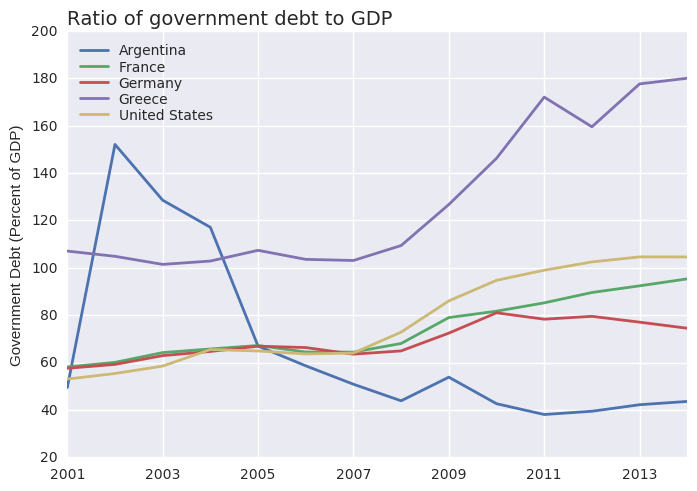

In [14]:
fig, ax = plt.subplots()
debt.plot(ax=ax, lw=2)
ax.set_title('Ratio of government debt to GDP', fontsize=14, loc='left')
ax.set_ylabel('Government Debt (Percent of GDP)')
ax.legend(loc='best', fontsize=10, handlelength=2, labelspacing=0.15)

### Questions

* What would you change in this picture?
* What did you learn?
* What else would you like to know?
* Where does the data come from?    

## Example:  Options data

**WARNING: This code is currently broken in `pandas_datareader`, so we will skip this for now**

The Pandas package is spinning off the remote data access tools, including FRED, World Bank, and so on.  Here we use the new tool, the Pandas DataReader.  This requires installation:  on the command line, enter 

`conda install pandas-datareader html5lib` 

and follow instructions.  

You can run commands on the command line from within jupyter by putting a `!` at the beginning of the line. To run the commands above you can do enter the following in a code cell:

```
!conda install -y pandas-datareader html5lib
```

We'll use the `Options` tool, which reads in prices of stock options from [Yahoo Finance](http://finance.yahoo.com/q/op?s=AMZN+Options).  The options come with a variety of contract specifications:

* Type.  **Calls** are options to buy, **puts** are options to sell.  
* Expiration.  The date when the option expires.  
* **Underlying**.  The asset you have a right to buy or sell.  In this data, it's a stock.  
* **Strike price**.  The price at which you are able to buy (calls) or sell (puts) the underlying.  

We give an illustration using options on Amazon stock.  

**The first version of this module was written by our very own Spencer Lyon.**  

```Python

from pandas_datareader.data import Options

"""
supply ticker, get option prices 
"""
ticker = 'aapl'
aapl = Options(ticker, 'yahoo')
data = aapl.get_all_data()

exp = aapl.expiry_dates     # get expiration dates 
exp
```

```Python
# get option prices 
cols = [0, 1, 2, 7]   
opexp = 2
print('Options with expiry', exp[opexp])
calls = otk.get_call_data(expiry=exp[opexp])[cols]
puts  = otk.get_put_data(expiry=exp[opexp])[cols]

calls.head()
```

```Python
# drop extra index levels 
calls = calls.reset_index(level=[1,2,3], drop=True)
puts  = puts.reset_index(level=[1,2,3], drop=True)

# cut off extremes 
spot = otk.underlying_price
print('Spot price', spot)
delta = 0.25
calls  = calls[(calls.index >= (1-delta)*spot) & (calls.index <= (1+delta)*spot)]
puts  = puts[(puts.index >= (1-delta)*spot) & (puts.index <= (1+delta)*spot)]

# compute avg of bid and ask  
calls['Mid'] = (calls['Bid'] + calls['Ask'])/2
puts['Mid']  = (puts['Bid'] + puts['Ask'])/2
```

```Python
# plot put and call prices
which = 'Mid'

fig, ax = plt.subplots()
calls[which].plot(lw=2, color='blue', alpha=0.6, ax=ax)
puts[which].plot(lw=2, color='magenta', alpha=0.6, ax=ax)
ymin, ymax = ax.get_ylim()
xmin, xmax = ax.get_xlim()
ax.set_title('Prices of Amazon options (bid-ask avg)', fontsize=14, loc='left')
ax.set_ylabel('Option Prices')
ax.set_xlabel('Strike Price')
ax.vlines(x=spot, ymin=ymin, ymax=ymax, linestyle='dashed')
ax.text(1.01*spot, 0.9*ymax, 'Stock price', horizontalalignment='left')
ax.text(0.875*spot, 0.13*ymax, 'Put prices', horizontalalignment='right', color='m')
ax.text(1.125*spot, 0.13*ymax, 'Call prices', horizontalalignment='left', color='b') 
```

### Questions

* What would you change in this picture?
* What did you learn?
* What else would you like to know?
* Where does the data come from?    

## Example:  Japan's aging population 

Data from the [UN's Population Division](http://esa.un.org/unpd/wpp/Download/Standard/Population/).  One of our favorite quotes:

> Last year, for the first time, sales of adult diapers in Japan exceeded those for babies. 

This is what the numbers look like.  They're UN projections, what they call the "medium variant." 

In [15]:
url1 = 'http://esa.un.org/unpd/wpp/DVD/Files/'
url2 = '1_Indicators%20(Standard)/EXCEL_FILES/1_Population/'
url3 = 'WPP2015_POP_F07_1_POPULATION_BY_AGE_BOTH_SEXES.XLS'
url = url1 + url2 + url3 

cols = [2, 4, 5] + list(range(6,28))
#est = pd.read_excel(url, sheetname=0, skiprows=16, parse_cols=cols, na_values=['…'])
prj = pd.read_excel(url, sheetname=1, skiprows=16, parse_cols=cols, na_values=['…'])

"""
for later:  change cols for the two sources, rename 80+ to 80-84, then concat 
#pop = pd.concat([est, prj], axis=0, join='outer')      
"""
pop = prj 

In [16]:
pop.head()

,"Major area, region, country or area *",Country code,Reference date (as of 1 July),0-4,5-9,10-14,15-19,20-24,25-29,30-34,...,55-59,60-64,65-69,70-74,75-79,80-84,85-89,90-94,95-99,100+
0,WORLD,900,2015,670928.185,637448.895,607431.299,590069.337,603508.555,609793.207,551085.426,...,339691.467,292726.792,215047.151,153207.026,114652.312,71449.698,37062.196,13388.529,2921.852,450.895
1,WORLD,900,2020,677599.590,664282.610,634568.409,604322.921,585831.926,599278.263,604808.769,...,387339.470,320927.366,267874.842,187441.892,123355.620,81851.457,42700.991,16937.683,4242.605,605.465
2,WORLD,900,2025,673174.914,671929.973,661684.410,631509.113,600050.925,581681.875,594598.480,...,428166.199,367325.750,295011.725,234797.844,152989.596,89822.147,49847.989,20116.420,5538.923,905.182
3,WORLD,900,2030,672121.017,667926.121,669744.224,658942.513,627343.133,595871.013,577192.328,...,450091.908,407564.034,339528.512,260426.171,193066.277,113475.561,56221.915,24041.609,6836.461,1244.851
4,WORLD,900,2035,678271.589,667353.285,665875.094,667248.100,655034.545,623315.619,591598.185,...,456022.842,429343.580,378601.876,301893.804,216249.259,144393.943,72643.007,28074.222,8397.572,1617.797


In [17]:
# rename some variables 
pop = pop.rename(columns={'Reference date (as of 1 July)': 'Year', 
                          'Major area, region, country or area *': 'Country', 
                          'Country code': 'Code'})
# select Japan and years 
countries = ['Japan']
years     = [2015, 2025, 2035, 2045, 2055, 2065]
pop = pop[pop['Country'].isin(countries) & pop['Year'].isin(years)]
pop = pop.drop(['Country', 'Code'], axis=1)
pop.head()

,Year,0-4,5-9,10-14,15-19,20-24,25-29,30-34,35-39,40-44,...,55-59,60-64,65-69,70-74,75-79,80-84,85-89,90-94,95-99,100+
1458,2015,5269.038,5398.973,5603.638,5960.784,6111.768,6843.421,7455.687,8345.753,9689.865,...,7535.334,8530.749,9452.518,7770.410,6297.532,4940.325,3115.732,1338.774,366.082,60.630
1460,2025,4872.732,5086.975,5275.897,5425.060,5665.781,6033.351,6166.461,6868.725,7446.336,...,8425.830,7577.456,7111.085,7810.061,8212.023,6065.908,3985.173,2137.536,712.019,115.971
1462,2035,4610.562,4720.645,4880.967,5114.258,5340.457,5502.279,5726.044,6067.218,6172.067,...,8129.515,9259.518,8021.327,7034.014,6319.464,6327.227,5517.980,2871.710,1029.126,216.863
1464,2045,4448.702,4529.657,4619.658,4748.906,4947.499,5194.574,5404.633,5541.785,5739.054,...,6728.225,7171.861,7796.329,8693.253,7260.858,5876.803,4469.537,3242.964,1597.432,338.945
1466,2055,4271.907,4371.016,4458.145,4557.117,4685.414,4829.637,5013.420,5236.482,5422.259,...,5971.177,5985.655,6493.459,6798.299,7167.066,7456.047,5368.363,3233.182,1437.057,462.541


In [18]:
pop = pop.set_index('Year').T
pop.head()

Year,2015,2025,2035,2045,2055,2065
0-4,5269.038,4872.732,4610.562,4448.702,4271.907,4098.930
5-9,5398.973,5086.975,4720.645,4529.657,4371.016,4183.472
10-14,5603.638,5275.897,4880.967,4619.658,4458.145,4280.722
15-19,5960.784,5425.060,5114.258,4748.906,4557.117,4395.831
20-24,6111.768,5665.781,5340.457,4947.499,4685.414,4517.465


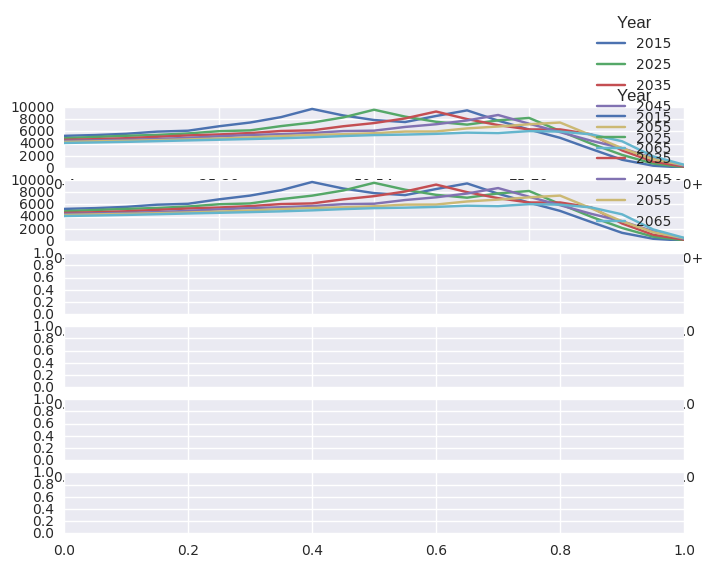

In [19]:
fig, ax = plt.subplots(6, 1)
pop.plot(ax=ax[0])
pop.plot(ax=ax[1])

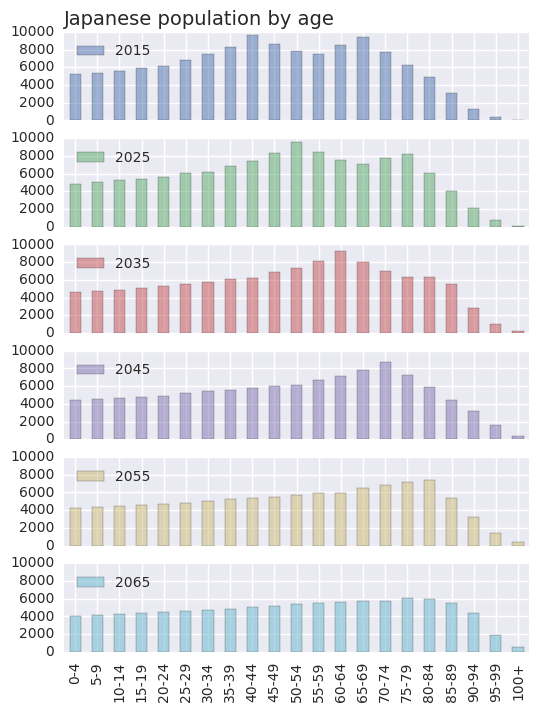

In [20]:
ax = pop.plot(kind='bar',  
         alpha=0.5, subplots=True, sharey=True, figsize=(6, 8))
for axnum in range(len(ax)):  
    ax[axnum].set_title('')
    ax[axnum].legend(loc='upper left', prop={'size':10})
    
ax[0].set_title('Japanese population by age', fontsize=14, loc='left')   

### Questions

* What would you change in this picture?
* What did you learn?
* What else would you like to know?
* Where does the data come from?    

## Example:  Birth rates

We might wonder, why is the population falling in Japan?  Other countries?  Well, one reason is that birth rates are falling.  Demographers call this fertility.  Here we look at the fertility using the same [UN source](http://esa.un.org/unpd/wpp/Download/Standard/Fertility/) as the previous example.  We look at two variables:  total fertility and fertility by age of mother.  In both cases we explore the numbers to date, but the same files contain projections of future fertility.  

In [21]:
%%time

# fertility overall 
uft  = 'http://esa.un.org/unpd/wpp/DVD/Files/'
uft += '1_Indicators%20(Standard)/EXCEL_FILES/'
uft += '2_Fertility/WPP2015_FERT_F04_TOTAL_FERTILITY.XLS'

cols = [2, 4] + list(range(5,18))
ftot = pd.read_excel(uft, sheetname=0, skiprows=16, parse_cols=cols, na_values=['…'])

# fertility by age 
ufa  = 'http://esa.un.org/unpd/wpp/DVD/Files/'
ufa += '1_Indicators%20(Standard)/EXCEL_FILES/'
ufa += '2_Fertility/WPP2015_FERT_F07_AGE_SPECIFIC_FERTILITY.XLS'

#cols = [2, 4, 5] + list(range(6,13))
#fage = pd.read_excel(ufa, sheetname=0, skiprows=16, parse_cols=cols, na_values=['…'])

CPU times: user 136 ms, sys: 0 ns, total: 136 ms
Wall time: 746 ms


In [22]:
ftot.head(3)[list(range(10))]

,"Major area, region, country or area *",Country code,1950-1955,1955-1960,1960-1965,1965-1970,1970-1975,1975-1980,1980-1985,1985-1990
0,WORLD,900,4.961571,4.898665,5.024379,4.922202,4.475478,3.865195,3.591816,3.446811
1,More developed regions,901,2.823786,2.807368,2.685900,2.387534,2.150816,1.917349,1.843806,1.807382
2,Less developed regions,902,6.075417,5.941033,6.129418,6.034843,5.416602,4.585636,4.167889,3.917106


In [23]:
# rename some variables 
ftot = ftot.rename(columns={'Major area, region, country or area *': 'Country', 
                            'Country code': 'Code'})

In [24]:
# drop code 
f = ftot.drop(['Code'], axis=1)

# select countries 
countries = ['China', 'Japan', 'Germany', 'United States of America']
f = f[f['Country'].isin(countries)]

# shape
f = f.set_index('Country').T 
f = f.rename(columns={'United States of America': 'United States'})
f.tail()

Country,China,Japan,Germany,United States
1990-1995,2.00,1.4760,1.3007,2.0297
1995-2000,1.48,1.3690,1.3456,1.9965
2000-2005,1.50,1.2980,1.3513,2.0420
2005-2010,1.53,1.3388,1.3623,2.0590
2010-2015,1.55,1.3960,1.3909,1.8902


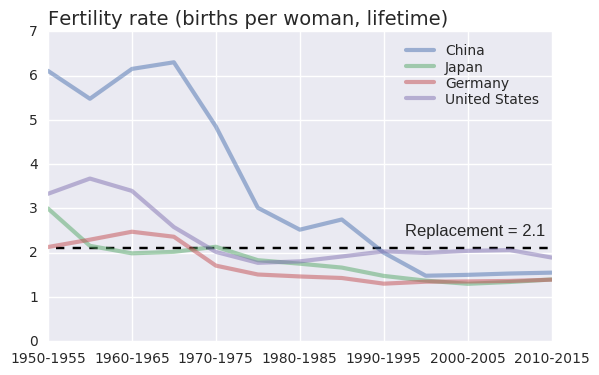

In [25]:
fig, ax = plt.subplots()
f.plot(ax=ax, kind='line', alpha=0.5, lw=3, figsize=(6.5, 4))
ax.set_title('Fertility rate (births per woman, lifetime)', fontsize=14, loc='left')
ax.legend(loc='best', fontsize=10, handlelength=2, labelspacing=0.15)
ax.set_ylim(ymin=0)
ax.hlines(2.1, -1, 13, linestyles='dashed')
ax.text(8.5, 2.4, 'Replacement = 2.1')

### Questions

* What would you change in this picture?
* What did you learn?
* What else would you like to know?
* Where does the data come from?    

## Example:  US government bond yields 

People often refer to interest rates moving up and down, but in fact the **yields** (as we call them) move up and down differently at different maturities.  From 2010 to 2015, for examples, yields on bonds with maturities under 2 years were essentially fixed at zero, but yields on higher maturities moved up and down quite a bit.  

One challenge with bond yields is getting good data.  Bonds are typically traded over the counter, and those bonds differ in maturity, coupon, and often other features.  Analysts often focus on the interest rates of pure discount "zero-coupon" bonds, which they infer from prices of coupon bonds -- which are, after all, what is generally traded.  This isn't something to go into unless you have a strong interest.  Suffice it to say that we have taken these yields from [estimates supplied by the Fed](http://www.federalreserve.gov/pubs/feds/2006/200628/200628abs.html).

This is still a work in progress, but our goal is to produce a movie of bond yields over time.  

In [26]:
url = 'http://pages.stern.nyu.edu/~dbackus/Data/GSW_nominal_yields.csv'
y = pd.read_csv(url, index_col=0, parse_dates=True)
y[list(range(10))].tail()

,y1,y2,y3,y4,y5,y6,y7,y8,y9,y10
2014-12-31,0.203838,0.185108,0.173745,0.168964,0.170051,0.176355,0.187282,0.202292,0.220892,0.242636
2015-01-31,0.270731,0.230483,0.199873,0.177721,0.162974,0.154694,0.152046,0.154287,0.160756,0.170868
2015-02-28,0.170712,0.153952,0.144484,0.141464,0.144129,0.151789,0.163823,0.179671,0.198828,0.220840
2015-03-31,0.271311,0.253007,0.240062,0.231969,0.228259,0.228504,0.232309,0.239310,0.249173,0.261594
2015-04-30,0.126999,0.125811,0.127855,0.132838,0.140489,0.150555,0.162804,0.177019,0.193000,0.210562


In [27]:
# compute mean yields
ybar = y.mean(axis=0)
ystd = y.std(axis=0)
maturities = list(range(1,122))
ybar.index = maturities
ystd.index = maturities

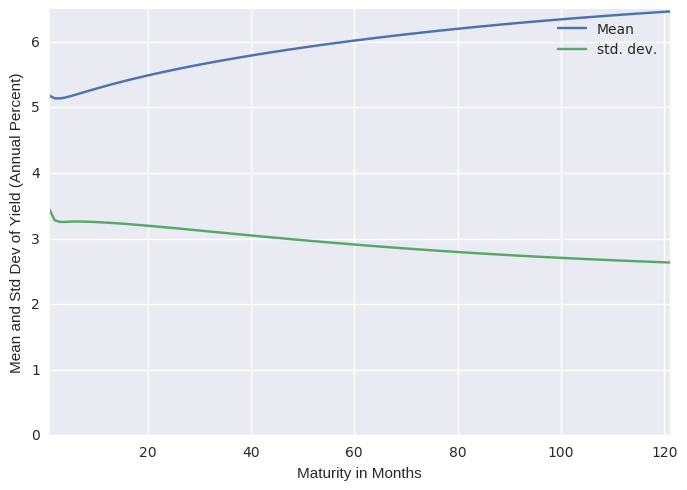

In [28]:
fig, ax = plt.subplots()
ybar.plot(ax=ax)
ystd.plot(ax=ax)
ax.set_xlabel('Maturity in Months')
ax.set_ylabel('Mean and Std Dev of Yield (Annual Percent)')
ax.set_ylim(0)
ax.legend(["Mean", "std. dev."])

## Starbucks Revenue

This data was given to us by one of our students. 

In [29]:
url1 = "https://github.com/NYUDataBootcamp/Materials/blob/master/"
url2 = "Data/Starbucks_Revenue_Worldwide.xlsx?raw=true"
url = url1 + url2
starbucks = pd.read_excel(url, 
                          sheetname=1,
                          skiprows=4,
                          parse_cols=[1,2])
starbucks

,Unnamed: 0,data
0,2003,4.10
1,2004,5.30
2,2005,6.40
3,2006,7.80
4,2007,9.40
5,2008,10.40
6,2009,9.80
7,2010,10.70
8,2011,11.70
9,2012,13.30


In [30]:
starbucks.rename(columns={"Unnamed: 0": "year", "data": "revenue"}, inplace=True)
starbucks

,year,revenue
0,2003,4.10
1,2004,5.30
2,2005,6.40
3,2006,7.80
4,2007,9.40
5,2008,10.40
6,2009,9.80
7,2010,10.70
8,2011,11.70
9,2012,13.30


In [31]:
starbucks.set_index("year", inplace=True)
starbucks

,revenue
year,
2003,4.10
2004,5.30
2005,6.40
2006,7.80
2007,9.40
2008,10.40
2009,9.80
2010,10.70
2011,11.70


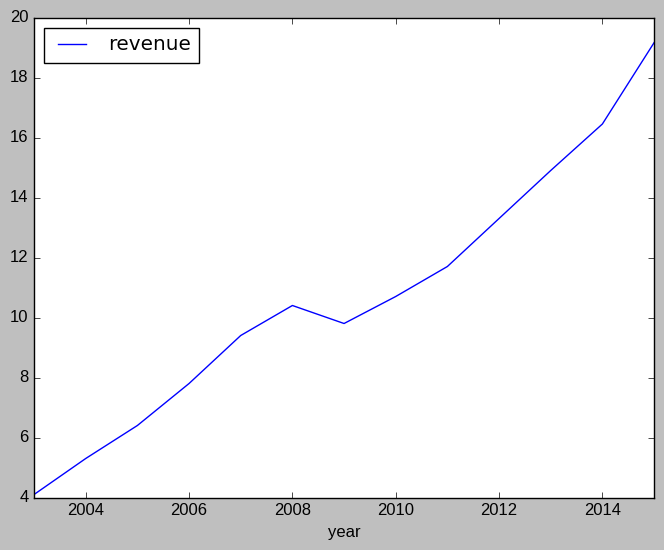

In [32]:
mpl.rcParams.update(mpl.rcParamsDefault)
starbucks.plot()

In [33]:
starbucks_growth = starbucks.pct_change()
starbucks_growth

,revenue
year,
2003,NaN
2004,0.292683
2005,0.207547
2006,0.218750
2007,0.205128
2008,0.106383
2009,-0.057692
2010,0.091837
2011,0.093458


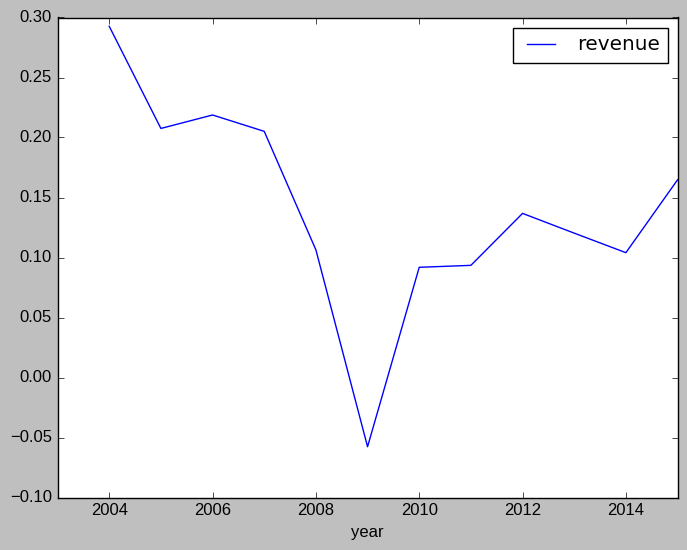

In [34]:
starbucks_growth.plot()